# Libraries

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pandas.api.types import CategoricalDtype

# Data

In [8]:
df = pd.read_excel('Case Study - Performance Analyst.xlsx')

In [9]:
df.head()

,Date,Time,City,CategoryID,Ride Status,Ride,BusTypeID,Route,Distance,Captain,Income,Paid to Captain,Bookings,Capacity,Rated Bookings,Summation of Ratings
0,2021-02-02,09:15:00,58d1560b2207c00001aabc9a,5f0b2962e8cce5001acf35b7,cancelled,60122a8d2a4d03001b97c75b,5952ece2cb93a600015aa7aa,597e2b4fa71e730010942009,36.275,5fd618746b09b6001def0429,164,67,1,13,0,0
1,2021-02-03,06:50:00,58d1560b2207c00001aabc9a,5f0b2962e8cce5001acf35b7,completed,6018c3c048c5b0001af0e559,5952ece2cb93a600015aa7aa,5c86a86984a318001946143e,69.227,5be954f8dcb6290018809545,47,143,5,14,5,5
2,2021-02-06,15:20:00,58d1560b2207c00001aabc9a,5f0b2962e8cce5001acf35b7,completed,601cb84aaf69a8001dc05439,5952ece2cb93a600015aa7aa,5c5843ec27f2c0001851e774,68.081,5d1b4d6c0703ca0018666c88,61,111,7,14,6,18
3,2021-02-06,10:00:00,58d1560b2207c00001aabc9a,5f0b2962e8cce5001acf35b7,cancelled,601770a948c5b0001aed7d91,5ffdecf3f0d94b001dcf80f1,5b5e4677a8ebb1001096479f,61.283,NaN,112,82,0,3,0,0
4,2021-02-01,11:05:00,58d1560b2207c00001aabc9a,5f0b2962e8cce5001acf35b7,cancelled,6010d9362a4d03001b95e858,5952ece2cb93a600015aa7aa,600a085402b7bd001dc76e96,29.918,5db468ccda99bf001afa5618,67,126,1,13,0,0


# Exploration

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  30000 non-null  datetime64[ns]
 1   Time                  30000 non-null  object        
 2   City                  30000 non-null  object        
 3   CategoryID            30000 non-null  object        
 4   Ride Status           30000 non-null  object        
 5   Ride                  30000 non-null  object        
 6   BusTypeID             30000 non-null  object        
 7   Route                 30000 non-null  object        
 8   Distance              30000 non-null  float64       
 9   Captain               28221 non-null  object        
 10  Income                30000 non-null  int64         
 11  Paid to Captain       30000 non-null  int64         
 12  Bookings              30000 non-null  int64         
 13  Capacity        

Column captain is the only attribute with NaN values.

In [13]:
df.describe()

,Distance,Income,Paid to Captain,Bookings,Capacity,Rated Bookings,Summation of Ratings
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,74.843488,123.844033,99.989367,4.419967,12.488700,2.211267,6.644200
std,844.064693,72.328326,57.545905,3.907178,7.990056,2.618395,9.232514
min,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,32.492000,61.000000,51.000000,1.000000,3.000000,0.000000,0.000000
50%,43.932000,124.000000,100.000000,3.000000,13.000000,1.000000,4.000000
75%,61.200000,186.000000,150.000000,8.000000,14.000000,3.000000,9.000000
max,58479.241000,250.000000,200.000000,13.000000,49.000000,13.000000,65.000000


# Q & A

## How many captains got paid more than the average payout?

In [22]:
avg_payout = df['Paid to Captain'].mean()
df[df['Paid to Captain'] > avg_payout]['Captain'].nunique()

1872

## How would you name these "Categors" sot that it would show up in the query results?

In [118]:
df.groupby('CategoryID', sort=False)['Distance'].mean().sort_values(ascending=False)

CategoryID
5f0b2962e8cce5001acf35b9    309.351243
5f4698a2d2afb2000d931b96     67.046000
5f0b2962e8cce5001acf35b7     64.272823
5f4698a2d2afb2000d931b92     45.244054
Name: Distance, dtype: float64

In [121]:
CategoryIDs = df.groupby('CategoryID', sort=False)['Distance'].mean().sort_values(ascending=False).index
CategoryIDs

Index(['5f0b2962e8cce5001acf35b9', '5f4698a2d2afb2000d931b96',
       '5f0b2962e8cce5001acf35b7', '5f4698a2d2afb2000d931b92'],
      dtype='object', name='CategoryID')

Since there are 4 category ids, I would replace them with A, B, C, and D, so that it's easier for analysis.

In [122]:
df['Category'] = df['CategoryID'].replace(CategoryIDs, ['A', 'B', 'C', 'D'])
df['Category'].sample(10)

13339    C
14645    D
17181    C
27122    C
18208    C
18482    C
8106     D
10521    C
23992    C
994      C
Name: Category, dtype: object

## What do you notice that does not make sense in the data?

### Distance, Income, and Paid to Captain

In [36]:
df[['Distance', 'Income']].corr()

,Distance,Income
Distance,1.000000,-0.000763
Income,-0.000763,1.000000


In [37]:
df[['Distance', 'Paid to Captain']].corr()

,Distance,Paid to Captain
Distance,1.000000,-0.005197
Paid to Captain,-0.005197,1.000000


There is no correlation between Distance attribute and the other two attributes; Income and Paid to Captain.

### Income sometimes less than Paid to Captain

In [39]:
df[df['Income'] < df['Paid to Captain']].head()

,Date,Time,City,CategoryID,Ride Status,Ride,BusTypeID,Route,Distance,Captain,Income,Paid to Captain,Bookings,Capacity,Rated Bookings,Summation of Ratings,Category
1,2021-02-03,06:50:00,58d1560b2207c00001aabc9a,5f0b2962e8cce5001acf35b7,completed,6018c3c048c5b0001af0e559,5952ece2cb93a600015aa7aa,5c86a86984a318001946143e,69.227,5be954f8dcb6290018809545,47,143,5,14,5,5,A
2,2021-02-06,15:20:00,58d1560b2207c00001aabc9a,5f0b2962e8cce5001acf35b7,completed,601cb84aaf69a8001dc05439,5952ece2cb93a600015aa7aa,5c5843ec27f2c0001851e774,68.081,5d1b4d6c0703ca0018666c88,61,111,7,14,6,18,A
4,2021-02-01,11:05:00,58d1560b2207c00001aabc9a,5f0b2962e8cce5001acf35b7,cancelled,6010d9362a4d03001b95e858,5952ece2cb93a600015aa7aa,600a085402b7bd001dc76e96,29.918,5db468ccda99bf001afa5618,67,126,1,13,0,0,A
5,2021-02-04,07:30:00,58d1560b2207c00001aabc9a,5f0b2962e8cce5001acf35b9,completed,60122b6e89d5fd001badf7e7,5d3d860f41213c001a51b8cf,5d7507c538fc72001a870618,246.968,5c45d5fe9fb2070018610968,56,98,6,11,1,3,B
7,2021-02-03,07:10:00,58d1560b2207c00001aabc9a,5f0b2962e8cce5001acf35b7,completed,60137befbe78ff001b702389,5952ece2cb93a600015aa7aa,5a31217dddc302000f5c1554,34.591,5b93a59521badf00104247cc,182,198,13,13,9,45,A


### Summation of Ratings
It is not useful by itself, an average rating would be more informative.

In [48]:
df['Average Rating'] = df['Summation of Ratings']/df['Rated Bookings']
df['Average Rating'].head()

0    NaN
1    1.0
2    3.0
3    NaN
4    NaN
Name: Average Rating, dtype: float64

## How many cancelled rides do we have daily?

In [67]:
df[df['Ride Status']=='cancelled'].groupby('Date')['Ride Status'].count()

Date
2021-01-31    1387
2021-02-01    1691
2021-02-02    1062
2021-02-03     825
2021-02-04     885
2021-02-05     259
2021-02-06     637
Name: Ride Status, dtype: int64

In [66]:
# percentage (extra mile)
df[df['Ride Status']=='cancelled'].groupby('Date')['Ride Status'].count()/df.groupby('Date')['Ride Status'].count()

Date
2021-01-31    0.256140
2021-02-01    0.280060
2021-02-02    0.195508
2021-02-03    0.156814
2021-02-04    0.177213
2021-02-05    0.329098
2021-02-06    0.307284
Name: Ride Status, dtype: float64

## How would you work on improving the completion %?

I would go investigating deeper on the higher percentage of cancellation, and see the reason behind that.

### Proportions

In [80]:
df[(df['Date']=='2021-02-05') | (df['Date']=='2021-02-06')].Category.value_counts()\
/len(df[(df['Date']=='2021-02-05') | (df['Date']=='2021-02-06')])

A    0.557343
B    0.241259
C    0.201399
Name: Category, dtype: float64

In [82]:
df[(df['Date']!='2021-02-05') | (df['Date']!='2021-02-06')].Category.value_counts()\
/len(df[(df['Date']!='2021-02-05') | (df['Date']!='2021-02-06')])

A    0.654200
C    0.280800
B    0.064933
D    0.000067
Name: Category, dtype: float64

There are some difference in the categories' proportions. Category A has a lower percentage, and that might be a reason why for cancellation in the last two days.

### Day of Week

In [112]:
df['Day of Week'] = df['Date'].apply(lambda x: x.dayofweek)
week_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_numbers = np.arange(0, 7)
df['Day of Week'] = df['Day of Week'].replace(week_numbers, week_name)
cat_type = CategoricalDtype(categories=week_name, ordered=True)
df['Day of Week'] = df['Day of Week'].astype(cat_type)

In [124]:
df[df['Ride Status']=='cancelled'].groupby('Day of Week')['Ride Status'].count()\
/df.groupby('Day of Week')['Ride Status'].count()

Day of Week
Monday       0.280060
Tuesday      0.195508
Wednesday    0.156814
Thursday     0.177213
Friday       0.329098
Saturday     0.307284
Sunday       0.256140
Name: Ride Status, dtype: float64

Highest cancellation rates occur on Friday and Saturday which are weekend in Egypt. A special approach can be applied such as cancellation fee in these two days to lower the cancellation.

## For low utilized routes, what are your thoughts on how to improve their utilization?

In [129]:
df['Seat Utilization'] = df['Bookings']/df['Capacity']
route_utilization_df = df.groupby('Route')['Seat Utilization'].mean().sort_values().reset_index()

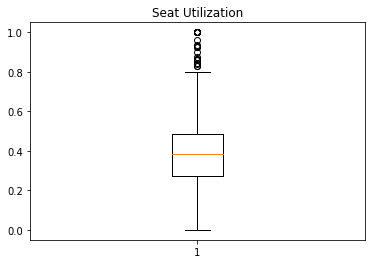

In [132]:
plt.title('Seat Utilization')
plt.boxplot(route_utilization_df['Seat Utilization']);

The mean is around 0.4 which is 40% of the capacity. The threshold of low utilization can be assumed to be 0.1.

In [147]:
routes_low_utilization = route_utilization_df[route_utilization_df['Seat Utilization'] < 0.1]['Route'].to_list()
df_low_utilization = df[df['Route'].isin(routes_low_utilization)]

In [149]:
df_low_utilization

,Date,Time,City,CategoryID,Ride Status,Ride,BusTypeID,Route,Distance,Captain,Income,Paid to Captain,Bookings,Capacity,Rated Bookings,Summation of Ratings,Category,Average Rating,Day of Week,Seat Utilization
338,2021-01-31,13:00:00,58d1560b2207c00001aabc9a,5f0b2962e8cce5001acf35b7,cancelled,600f891d0f6e2a001ae1e297,5952ece2cb93a600015aa7aa,600a08b71a75a4001dddf6cb,26.115,5da349b004ab4f001ae4cc5b,66,149,1,13,0,0,C,NaN,Sunday,0.076923
514,2021-02-04,16:30:00,5947b64eb17fa400018ed437,5f0b2962e8cce5001acf35b9,cancelled,60122cbb2a4d03001b985b61,590dbfef94df860001c8aab6,5ff8a6c6b1d41a001edb9381,247.344,5a0bf7a70eb9ed000fa7a618,81,38,1,22,1,5,A,5.0,Thursday,0.045455
524,2021-02-05,02:00:00,5947b64eb17fa400018ed437,5f0b2962e8cce5001acf35b9,cancelled,601c2fdad70e69001df7ba2e,5f26f92bd77fd0001a77f4cd,5ff750952829a5001d4a9414,247.344,5e1b388b5e46d0001a49d8af,194,165,1,11,1,4,A,4.0,Friday,0.090909
862,2021-02-03,13:30:00,58d1560b2207c00001aabc9a,5f0b2962e8cce5001acf35b9,cancelled,6010db4389d5fd001bab9c9b,5952ece2cb93a600015aa7aa,5ff8a6cfa4aef9001d31cb7b,247.050,5bb49938133e97001171224b,92,66,1,13,0,0,A,NaN,Wednesday,0.076923
1232,2021-02-01,15:30:00,58d1560b2207c00001aabc9a,5f0b2962e8cce5001acf35b7,cancelled,6010d9ba2a4d03001b963720,5952ece2cb93a600015aa7aa,5fdd0f33987f55001d063c8e,67.302,5da349b004ab4f001ae4cc5b,157,72,1,13,0,0,C,NaN,Monday,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29012,2021-01-31,10:10:00,5947b64eb17fa400018ed437,5f4698a2d2afb2000d931b92,cancelled,60122d3f62b685001b9e4e92,5f0f90e345bc80001ae4c419,5fff4a4b3f4dd5001db3502d,13.230,5f6b50555d804e001c804d3a,154,141,2,29,2,10,D,5.0,Sunday,0.068966
29125,2021-02-03,19:00:00,58d1560b2207c00001aabc9a,5f0b2962e8cce5001acf35b7,completed,601aaf878ff2bf001d9dcddf,5d151a38428e82001afc5d5f,601aaec48ddd6e001da721bc,287.667,5f414a3b6d2080001c5baf3c,245,82,0,4,0,0,C,NaN,Wednesday,0.000000
29304,2021-02-06,06:10:00,58d1560b2207c00001aabc9a,5f0b2962e8cce5001acf35b7,completed,601cb85ef71aa8001b613e4f,590dbfef94df860001c8aab6,5c407cd500e32400189eb93f,54.527,5e0a6468d480d3001acd116b,11,160,3,26,3,15,C,5.0,Saturday,0.115385
29513,2021-02-02,16:30:00,5947b64eb17fa400018ed437,5f0b2962e8cce5001acf35b9,cancelled,600f91270f6e2a001ae5aceb,590dbfef94df860001c8aab6,5ff8a6c6b1d41a001edb9381,247.344,5a0bf7a70eb9ed000fa7a618,41,84,2,22,2,8,A,4.0,Tuesday,0.090909


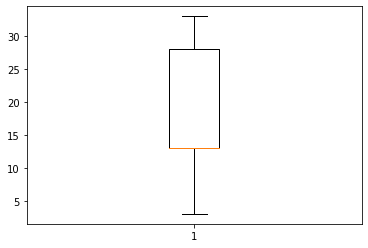

In [153]:
plt.boxplot(df_low_utilization['Capacity']);

One of the solutions is to lower the Capaicty. For those routes with extreme low values of utilization, providing customers with smaller buses would not affect the service, but it would decrease the cost which increases the net profit.

## For low performing captains, quantify the percentage of these captains overall. How would you take actions with these captains?

In [159]:
df['Ride Status 0/1'] = df['Ride Status'].replace(['cancelled', 'completed'], [0, 1])
df_captain_completion = df.groupby('Captain')['Ride Status 0/1'].mean().reset_index()\
                          .rename(columns={'Ride Status 0/1':'Completion Percentage'})
df_captain_completion.head()

,Captain,Completion Percentage
0,58f4d3a64c39990001bca2be,1.000000
1,58fd2ae99df6660001541a83,0.666667
2,593929e7720c9b0001784ab5,0.800000
3,59502ea58c469600015d33f3,1.000000
4,5962a4c368380e000122d8bf,1.000000


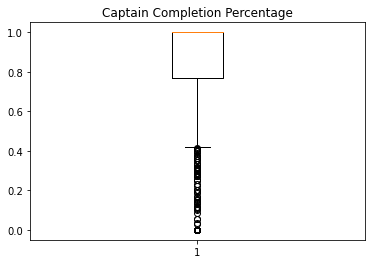

In [161]:
plt.title('Captain Completion Percentage')
plt.boxplot(df_captain_completion['Completion Percentage']);

In [162]:
low_completion_captain = df_captain_completion[df_captain_completion['Completion Percentage'] < 0.7]['Captain'].to_list()
low_completion_captain

['58fd2ae99df6660001541a83',
 '59b52aab60ee69000f08cdbc',
 '59cbc75a3f00a6001087f117',
 '59f489c208e1a5000f3c2ffb',
 '5a018bf4e407cb0010a908d2',
 '5a0bf7a70eb9ed000fa7a618',
 '5a1ab458af1076000f97341b',
 '5a3535871f6a71000f036f80',
 '5a7f06951743bb00102564ea',
 '5aa406744df890000f5c631a',
 '5ab6a496a188b8000f367108',
 '5abf7d7c176690000f0dbc17',
 '5ac1f2302b522400101ced37',
 '5ac8c589e6c8b80010516ab1',
 '5adb53b926b2850010d57cb4',
 '5ae43688b0a038001067cd2b',
 '5aed90cb4cd4f7001058cf01',
 '5b0ea90f00d7de000fc2ff6b',
 '5b179d369b2a17001013e993',
 '5b3373a08416590010fd1b5d',
 '5b34a681218a59000fb94bbb',
 '5b38bf3d9befc80010b96862',
 '5b3a349869bc2400100c6cde',
 '5b3dfd70988a92000f3034be',
 '5b40acf6ed87ee000f0deabd',
 '5b49eb68729103000f9a3f4a',
 '5b4b2d13549ebc000f6b6d82',
 '5b53242b40d0120010aa6e2a',
 '5b5c9024d26cfa000fbd7f88',
 '5b5de9e358bb0c000fc3d30f',
 '5b6705be3493f00012cf1fda',
 '5b6989dbe121220010b397f2',
 '5b93e450ddcabd001055bab6',
 '5b9d1ea6705c28000f47ac59',
 '5baa08b66b61

Since I identified the captain with the lowest completion rate, I would recommend to make an investigation and know the reason behind the cancellation. Give a notice for understandable reasons, and dismissal for non-understandable reasons.

## What's the average rating per captain on a daily basis?

In [164]:
df.groupby(['Captain', 'Date'])['Average Rating'].mean()

Captain                   Date      
58f4d3a64c39990001bca2be  2021-01-31    3.250000
                          2021-02-01    4.000000
                          2021-02-02    3.000000
                          2021-02-03    2.500000
                          2021-02-04    3.000000
                                          ...   
601a60b65cf885001d6bb47d  2021-02-04    2.000000
601a693282f675001e072caf  2021-02-04    5.000000
601a6d1b82f675001e072e68  2021-02-04    1.000000
601a76cbdac207001d32e585  2021-02-04    2.666667
601a7a527ce2dd001eae7219  2021-02-04    4.000000
Name: Average Rating, Length: 9267, dtype: float64